In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) =mnist.load_data() 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
only_zeros = X_train[y_train==0]

In [6]:
only_zeros.shape

(5923, 28, 28)

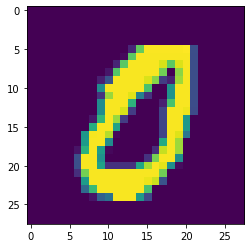

In [7]:
plt.imshow(only_zeros[10])

In [8]:
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [12]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation ='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer ='adam')

In [13]:
codings_size = 100

In [14]:
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape = [codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [15]:
GAN = Sequential([generator,discriminator])
discriminator.trainable=False
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
batch_size =32
my_data = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [33]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [48]:
epochs=10

In [35]:
GAN

In [36]:
GAN.layers[0].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [37]:
GAN.layers[1].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [49]:
generator,discriminator = GAN.layers


for epoch in range(epochs):
    print(f"Currently on Epoch{epoch+1}")
    i=0
    for X_batch in dataset:
        i= i+1
        if i%100==0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
        
        # discriminator
        noise = tf.random.normal(shape=[batch_size,codings_size])
        gen_images = generator(noise)
        X_fake_vs_real= tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        # generator
        noise = tf.random.normal(shape = [batch_size,codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable =False 
        GAN.train_on_batch(noise,y2)
        

Currently on Epoch1
	 Currently on batch number 100 of 185
Currently on Epoch2
	 Currently on batch number 100 of 185
Currently on Epoch3
	 Currently on batch number 100 of 185
Currently on Epoch4
	 Currently on batch number 100 of 185
Currently on Epoch5
	 Currently on batch number 100 of 185
Currently on Epoch6
	 Currently on batch number 100 of 185
Currently on Epoch7
	 Currently on batch number 100 of 185
Currently on Epoch8
	 Currently on batch number 100 of 185
Currently on Epoch9
	 Currently on batch number 100 of 185
Currently on Epoch10
	 Currently on batch number 100 of 185


In [50]:
noise = tf.random.normal(shape=[10,codings_size])
noise.shape

TensorShape([10, 100])

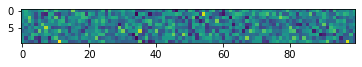

In [51]:
plt.imshow(noise)

In [52]:

images = generator(noise)

In [53]:
images.shape

TensorShape([10, 28, 28])

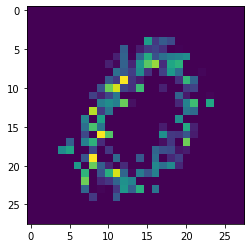

In [54]:
plt.imshow(images[0])

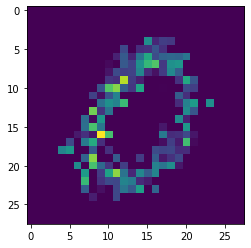

In [55]:
## Similar images are generated this is mode collapse
plt.imshow(images[9])